# TODO Notebook under construction

# Calculation of the loss function for regression


**Goal:** .


**Usage:** . 

**Dataset:** Artificial.

**Content:**
* 
* 
* 


| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_04/nb_ch04_04.ipynb)



In [1]:
#load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras import optimizers

tf.__version__

'2.0.0-alpha0'

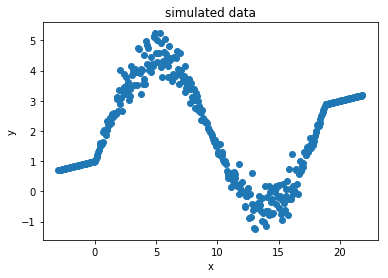

In [2]:
## Simulate some data 
np.random.seed(32)
n = 300
x = np.linspace(0,1*2*np.pi,n)
y1 = 3*np.sin(x)
y1 = np.concatenate((np.zeros(60), y1+np.random.normal(0,0.15*np.abs(y1),n),np.zeros(60)))
x=np.concatenate((np.linspace(-3,0,60),np.linspace(0,3*2*np.pi,n),np.linspace(3*2*np.pi,3*2*np.pi+3,60)))
y2 = 0.1*x+1
y=y1+y2
plt.scatter(x=x,y=y,marker='o')
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
n=len(x)

In [3]:
model = Sequential()
model.add(Dense(1, activation='linear',batch_input_shape=(None, 1)))
model.compile(loss='mean_squared_error',optimizer="adam")

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:

# train the model# train  
history=model.fit(x, y, 
                  batch_size=n, 
                  epochs=5000,
                  verbose=0, 
                 )

In [6]:
model.evaluate(x,y)

420/420 [==============================] - 0s 89us/sample - loss: 2.9440


2.944007272237823

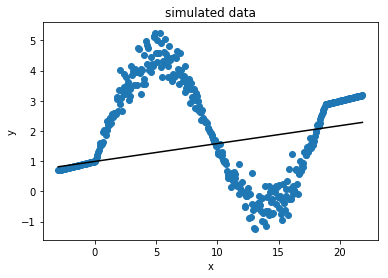

In [7]:
plt.scatter(x=x,y=y,marker='o')
plt.plot(x,model.predict(x),c="black")
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [8]:
model.get_weights()

[array([[0.05909659]], dtype=float32), array([0.99441314], dtype=float32)]

In [9]:
model = Sequential()
model.add(Dense(20, activation='relu',batch_input_shape=(None, 1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
#
model.compile(loss='mean_squared_error',optimizer="adam")


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 2,131
Trainable params: 2,131
Non-trainable params: 0
_________________________________________________________________


In [11]:
# train the model
history=model.fit(x, y, 
                  batch_size=n, 
                  epochs=10000,
                  verbose=0, 
                 )

In [12]:
model.evaluate(x,y)

420/420 [==============================] - 0s 95us/sample - loss: 0.1092


0.10922295873571697

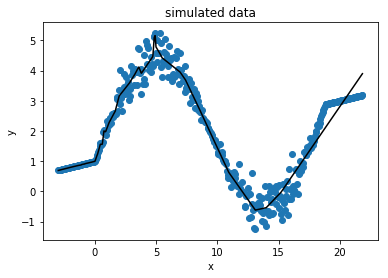

In [13]:
plt.scatter(x=x,y=y,marker='o')
plt.plot(np.linspace(-3,3*2*np.pi+3,1000),model.predict(np.linspace(-3,3*2*np.pi+3,1000)),c="black")
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [16]:
def my_loss(y_true,y_pred):
  mu=tf.slice(y_pred,[0,0],[-1,1])          ## extract first row
  log_sigma=tf.slice(y_pred,[0,1],[-1,1])   ## extract second row
  
  a=1/(tf.sqrt(2*3.141*tf.square(tf.exp(log_sigma)))) 
  b1=tf.square(mu-y_true)
  b2=2*tf.square(tf.exp(log_sigma))
  b=b1/b2
  
  loss = tf.reduce_sum(-tf.math.log(a)+b,axis=0)
  return loss

In [17]:
model =  Sequential()
model.add(Dense(20, activation='relu',batch_input_shape=(None, 1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='linear'))

model.compile(loss=my_loss,optimizer="adam",metrics=[my_loss])

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_10 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_11 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 42        
Total params: 2,152
Trainable params: 2,152
Non-trainable params: 0
_________________________________________________________________


In [19]:
history=model.fit(x, y, 
                  batch_size=n, 
                  epochs=4000,
                  verbose=0)

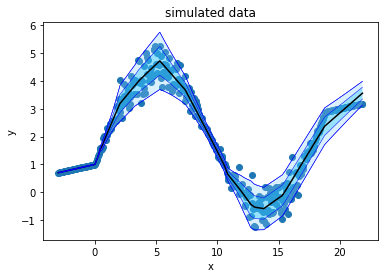

In [20]:
x_pred=np.linspace(-3,3*2*np.pi+3,1000).reshape(1000,1)
pred_mu=model.predict(np.linspace(-3,3*2*np.pi+3,1000).reshape(1000,1))[:,0]
pred_log_sigma=model.predict(np.linspace(-3,3*2*np.pi+3,1000).reshape(1000,1))[:,1]
plt.scatter(x,y,marker='o')
plt.plot(x_pred,pred_mu,c="black")

pred_1_sd_p = pred_mu+(np.exp(pred_log_sigma))
pred_1_sd_m = pred_mu-(np.exp(pred_log_sigma))

plt.plot(x_pred,pred_1_sd_p, 'b', linewidth=0.5)
plt.plot(x_pred,pred_1_sd_m, 'b', linewidth=0.5)

pred_2_sd_p = pred_mu+2*(np.exp(pred_log_sigma))
pred_2_sd_m = pred_mu-2*(np.exp(pred_log_sigma))

plt.plot(x_pred,pred_2_sd_p, 'b', linewidth=0.5)
plt.plot(x_pred,pred_2_sd_m, 'b', linewidth=0.5)

plt.plot(x_pred,pred_mu+2*(np.exp(pred_log_sigma)), 'b', linewidth=0.5)
plt.plot(x_pred,pred_mu-2*(np.exp(pred_log_sigma)), 'b', linewidth=0.5)

plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([pred_2_sd_p,
                         pred_2_sd_m[::-1]]),alpha=0.3, fc='lightskyblue', ec='None')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([pred_1_sd_p,
                         pred_1_sd_m[::-1]]),alpha=0.3, fc='deepskyblue', ec='None')
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### The Likelihood for different number of faces

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  


*Exercise: Change the activations to sigmoid and redo the analysis.

####.

































#### Solution 
The curves (mean and also stddev=) now apprear much smoother. This effect is probably due to the fact that relus are not smooth and if you change the input to a ReLU from negative to small positive you gets activated and contributes to the output.